# **Predictive Modelling of Phishing Website Detection**

*Training and Comparison of machine Learning Models Performance on Detecting Phishing Websites*

## **1. Objective:**
The objective of this notebook is to train machine learning models and deep neural nets on the dataset that has been created to predict phishing websites. The performance level of each model is measures and compared.

*This project is worked on Google Collaboratory.*<br>


## **2. Loading Data:**

The features are extracted and store in the csv file. The working of this can be seen in the 'Creating a New Dataset by Feature Extraction for Detection of Phishing Websites.ipynb' file.

The reulted csv file is uploaded to this notebook and stored in the dataframe.

In [ ]:
#importing basic packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving 5.urldata.csv to 5.urldata.csv


In [ ]:
#Loading the data
data0 = pd.read_csv('5.urldata.csv')
data0.head()

,Domain,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Web_Traffic,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,Label
0,graphicriver.net,0,0,1,1,0,0,0,0,0,1,1,1,0,0,1,0,0
1,ecnavi.jp,0,0,1,1,1,0,0,0,0,1,1,1,0,0,1,0,0
2,hubpages.com,0,0,1,1,0,0,0,0,0,1,0,1,0,0,1,0,0
3,extratorrent.cc,0,0,1,3,0,0,0,0,0,1,0,1,0,0,1,0,0
4,icicibank.com,0,0,1,3,0,0,0,0,0,1,0,1,0,0,1,0,0


## **3. Familiarizing with Data**
In this step, few dataframe methods are used to look into the data and its features.

In [ ]:
#Checking the shape of the dataset
data0.shape

(10000, 18)

In [ ]:
#Listing the features of the dataset
data0.columns

Index(['Domain', 'Have_IP', 'Have_At', 'URL_Length', 'URL_Depth',
       'Redirection', 'https_Domain', 'TinyURL', 'Prefix/Suffix', 'DNS_Record',
       'Web_Traffic', 'Domain_Age', 'Domain_End', 'iFrame', 'Mouse_Over',
       'Right_Click', 'Web_Forwards', 'Label'],
      dtype='object')

In [ ]:
#Information about the dataset
data0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Domain         10000 non-null  object
 1   Have_IP        10000 non-null  int64 
 2   Have_At        10000 non-null  int64 
 3   URL_Length     10000 non-null  int64 
 4   URL_Depth      10000 non-null  int64 
 5   Redirection    10000 non-null  int64 
 6   https_Domain   10000 non-null  int64 
 7   TinyURL        10000 non-null  int64 
 8   Prefix/Suffix  10000 non-null  int64 
 9   DNS_Record     10000 non-null  int64 
 10  Web_Traffic    10000 non-null  int64 
 11  Domain_Age     10000 non-null  int64 
 12  Domain_End     10000 non-null  int64 
 13  iFrame         10000 non-null  int64 
 14  Mouse_Over     10000 non-null  int64 
 15  Right_Click    10000 non-null  int64 
 16  Web_Forwards   10000 non-null  int64 
 17  Label          10000 non-null  int64 
dtypes: int64(17), object(1)
mem

## **4. Visualizing the data**
Few plots and graphs are displayed to find how the data is distributed and the how features are related to each other.

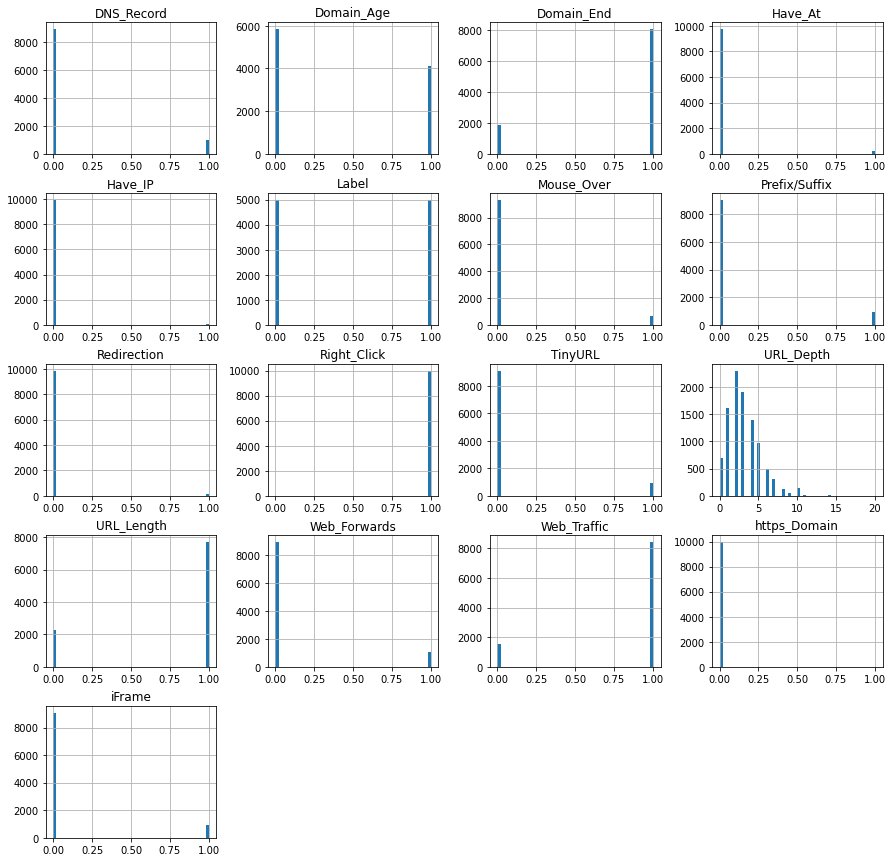

In [ ]:
#Plotting the data distribution
data0.hist(bins = 50,figsize = (15,15))
plt.show()

<ipython-input-4-3dd0327f0370>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  ax = sns.heatmap(data0.corr(), annot=True,  fmt='.2f', annot_kws={"fontsize":10})


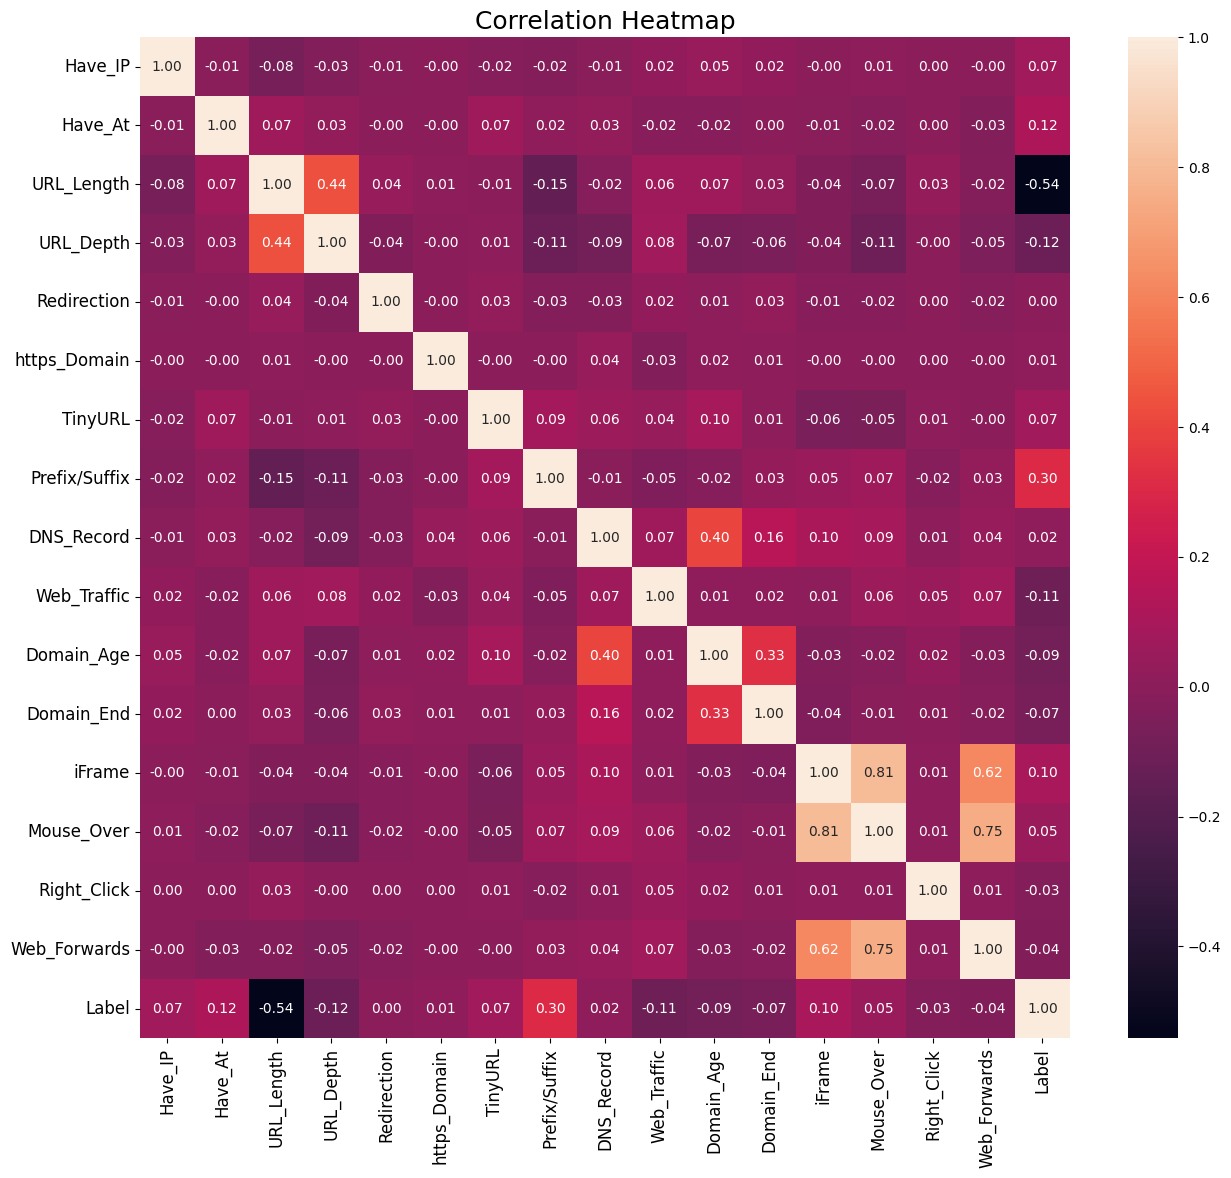

In [ ]:
#Correlation heatmap

plt.figure(figsize=(15,13))
ax = sns.heatmap(data0.corr(), annot=True,  fmt='.2f', annot_kws={"fontsize":10})
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Correlation Heatmap', fontsize=18)
plt.show()


## **5. Data Preprocessing & EDA**
Here, we clean the data by applying data preprocesssing techniques and transform the data to use it in the models.

In [ ]:
data0.describe()

,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Web_Traffic,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,Label
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0000,10000.000000,10000.00000,10000.00000,10000.000000,10000.000000
mean,0.005500,0.022600,0.773400,3.072000,0.013500,0.000200,0.090300,0.093200,0.100800,0.845700,0.413700,0.8099,0.090900,0.06660,0.99930,0.105300,0.500000
std,0.073961,0.148632,0.418653,2.128631,0.115408,0.014141,0.286625,0.290727,0.301079,0.361254,0.492521,0.3924,0.287481,0.24934,0.02645,0.306955,0.500025
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.00000,0.00000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.0000,0.000000,0.00000,1.00000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.0000,0.000000,0.00000,1.00000,0.000000,0.500000
75%,0.000000,0.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.0000,0.000000,0.00000,1.00000,0.000000,1.000000
max,1.000000,1.000000,1.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0000,1.000000,1.00000,1.00000,1.000000,1.000000


The above obtained result shows that the most of the data is made of 0's & 1's except 'Domain' & 'URL_Depth' columns. The Domain column doesnt have any significance to the machine learning model training. So dropping the *'Domain'* column from the dataset. 

In [ ]:
#Dropping the Domain column
data = data0.drop(['Domain'], axis = 1).copy()

This leaves us with 16 features & a target column. The *'URL_Depth'* maximum value is 20. According to my understanding, there is no necessity to change this column.

In [ ]:
#checking the data for null or missing values
data.isnull().sum()

Have_IP          0
Have_At          0
URL_Length       0
URL_Depth        0
Redirection      0
https_Domain     0
TinyURL          0
Prefix/Suffix    0
DNS_Record       0
Web_Traffic      0
Domain_Age       0
Domain_End       0
iFrame           0
Mouse_Over       0
Right_Click      0
Web_Forwards     0
Label            0
dtype: int64

In the feature extraction file, the extracted features of legitmate & phishing url datasets are just concatenated without any shuffling. This resulted in top 5000 rows of legitimate url data & bottom 5000 of phishing url data. 

To even out the distribution while splitting the data into training & testing sets, we need to shuffle it. This even evades the case of overfitting while model training.

In [ ]:
# shuffling the rows in the dataset so that when splitting the train and test set are equally distributed
data = data.sample(frac=1).reset_index(drop=True)
data.head()

,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Web_Traffic,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,Label
0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1
1,0,1,1,2,0,0,0,0,0,1,0,1,0,0,1,0,0
2,0,0,1,5,0,0,0,0,0,1,0,1,0,0,1,0,0
3,0,0,1,5,0,0,0,0,0,1,0,1,0,0,1,0,0
4,0,0,1,3,0,0,0,0,0,1,0,0,1,1,1,1,0


From the above execution, it is clear that the data doesnot have any missing values.

By this, the data is throughly preprocessed & is ready for training.

## **6. Splitting the Data**

In [ ]:
# Sepratating & assigning features and target columns to X & y
y = data['Label']
X = data.drop('Label',axis=1)
X.shape, y.shape

((10000, 16), (10000,))

In [ ]:
# Splitting the dataset into train and test sets: 80-20 split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.2, random_state = 12)
X_train.shape, X_test.shape

((8000, 16), (2000, 16))

## **7. Machine Learning Models & Training**

 The supervised machine learning models (classification) considered to train the dataset in this notebook are:
* Decision Tree
* Random Forest
* Multilayer Perceptrons
* XGBoost
* Autoencoder Neural Network
* Support Vector Machines

In [ ]:
#importing packages
from sklearn.metrics import accuracy_score

In [ ]:
# Creating holders to store the model performance results
ML_Model = []
acc_train = []
acc_test = []


#function to call for storing the results
def storeResults(model, a, b):
  ML_Model.append(model)
  acc_train.append(round(a, 3))
  acc_test.append(round(b, 3))


     

### **7.1. Decision Tree Classifier**


In [ ]:
# Decision Tree model 
from sklearn.tree import DecisionTreeClassifier

# instantiate the model 
tree = DecisionTreeClassifier(max_depth = 10)
# fit the model 
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10)

In [ ]:
#predicting the target value from the model for the samples
y_test_tree = tree.predict(X_test)
y_train_tree = tree.predict(X_train)

**Performance Evaluation:**

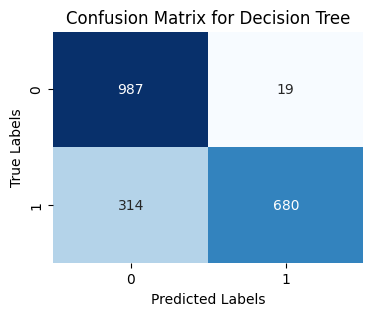

Decision Tree: Precision on test data: 0.8657
Decision Tree: Recall on test data: 0.8326
Decision Tree: Accuracy on training Data: 0.839
Decision Tree: Accuracy on test Data: 0.834


In [ ]:
# computing the accuracy, recall, and precision for training and test data
acc_train_tree = accuracy_score(y_train, y_train_tree)
acc_test_tree = accuracy_score(y_test, y_test_tree)

recall_tree = recall_score(y_test, y_test_tree, average='macro')
precision_tree = precision_score(y_test, y_test_tree, average='macro')

# compute the confusion matrix for test data
conf_matrix_tree = confusion_matrix(y_test, y_test_tree)

# plot the confusion matrix in a nice plot
plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix_tree, annot=True, fmt='g', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Decision Tree')
plt.show()

# print the precision and recall scores for test data
print("Decision Tree: Precision on test data: {:.4f}".format(precision_tree))
print("Decision Tree: Recall on test data: {:.4f}".format(recall_tree))
print("Decision Tree: Accuracy on training Data: {:.3f}".format(acc_train_tree))
print("Decision Tree: Accuracy on test Data: {:.3f}".format(acc_test_tree))


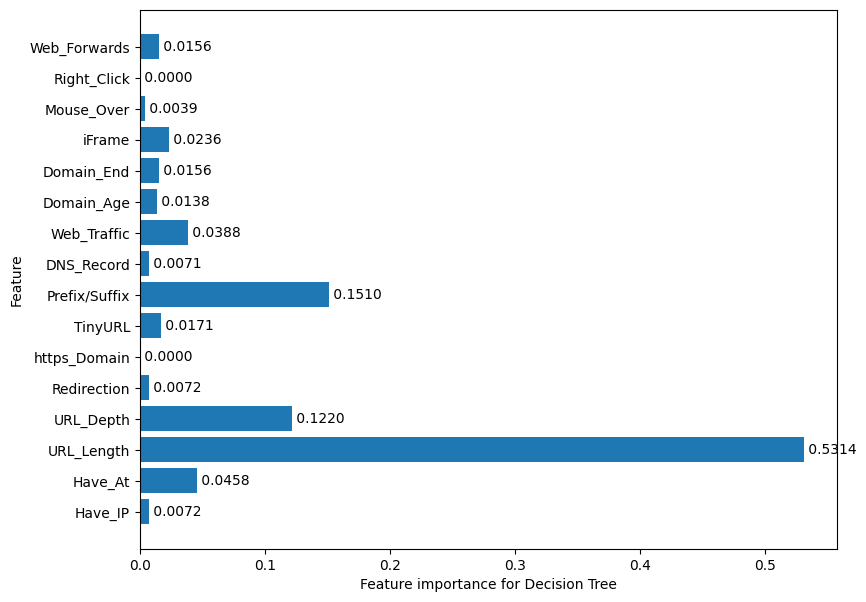

In [ ]:
# Checking the feature importance in the model
plt.figure(figsize=(9,7))
n_features = X_train.shape[1]
feature_importance = tree.feature_importances_
plt.barh(range(n_features), feature_importance, align='center')
plt.yticks(np.arange(n_features), X_train.columns)
plt.xlabel("Feature importance for Decision Tree")
plt.ylabel("Feature")
for i, v in enumerate(feature_importance):
    plt.text(v, i, " {:.4f}".format(v), color='black', va='center')
plt.show()

**Storing the results:**

In [ ]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('Decision Tree', acc_train_tree, acc_test_tree)

### **7.2. Random Forest Classifier**


In [ ]:
# Random Forest model
from sklearn.ensemble import RandomForestClassifier

# instantiate the model
forest = RandomForestClassifier(max_depth=10)

# fit the model 
forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=10)

In [ ]:
#predicting the target value from the model for the samples
y_test_forest = forest.predict(X_test)
y_train_forest = forest.predict(X_train)

**Performance Evaluation:**

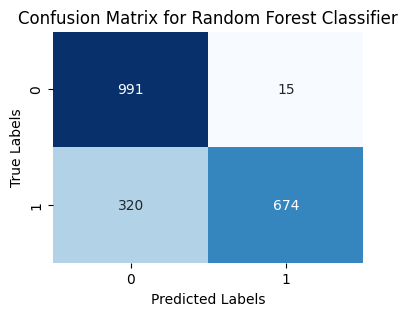

Random forest: Precision on test data: 0.8671
Random forest: Recall on test data: 0.8316
Random forest: Accuracy on training Data: 0.842
Random forest: Accuracy on test Data: 0.833


In [ ]:
from sklearn.metrics import precision_score, recall_score
import matplotlib.pyplot as plt
import seaborn as sns

# compute the accuracy, recall, and precision for training and test data
acc_train_forest = accuracy_score(y_train, y_train_forest)
acc_test_forest = accuracy_score(y_test, y_test_forest)
recall_forest = recall_score(y_test, y_test_forest, average='macro')
precision_forest = precision_score(y_test, y_test_forest, average='macro')

# compute the confusion matrix for test data
conf_matrix_forest = confusion_matrix(y_test, y_test_forest)

# plot the confusion matrix in a nice plot
plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix_forest, annot=True, fmt='g', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Random Forest Classifier')
plt.show()

# print the precision and recall scores for test data
print("Random forest: Precision on test data: {:.4f}".format(precision_forest))
print("Random forest: Recall on test data: {:.4f}".format(recall_forest))
print("Random forest: Accuracy on training Data: {:.3f}".format(acc_train_forest))
print("Random forest: Accuracy on test Data: {:.3f}".format(acc_test_forest))

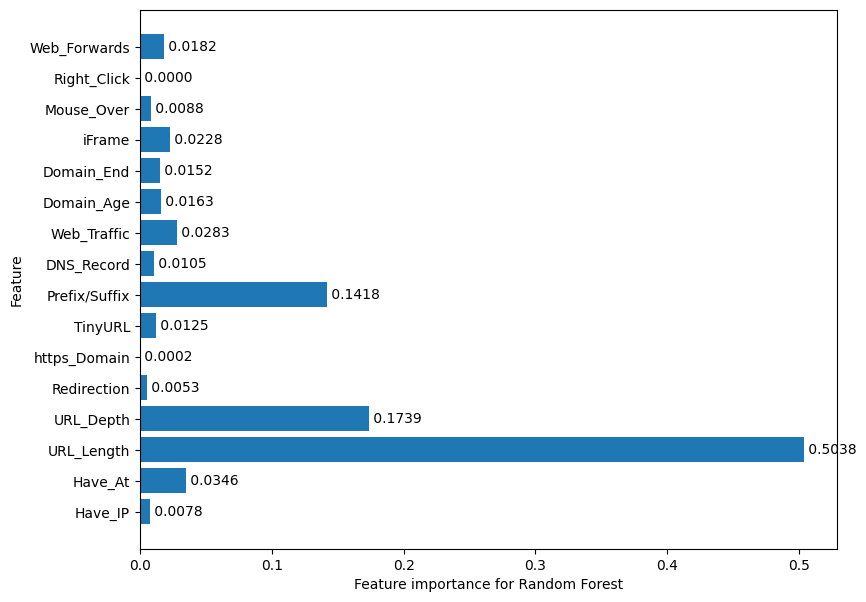

In [ ]:
# Checking the feature importance in the model
plt.figure(figsize=(9,7))
n_features = X_train.shape[1]
feature_importance = forest.feature_importances_
plt.barh(range(n_features), feature_importance, align='center')
plt.yticks(np.arange(n_features), X_train.columns)
plt.xlabel("Feature importance for Random Forest")
plt.ylabel("Feature")
for i, v in enumerate(feature_importance):
    plt.text(v, i, " {:.4f}".format(v), color='black', va='center')
plt.show()


**Storing the results:**

In [ ]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('Random Forest', acc_train_forest, acc_test_forest)

### **7.3. Multilayer Perceptrons (MLPs): Deep Learning**


In [ ]:
# Multilayer Perceptrons model
from sklearn.neural_network import MLPClassifier

# instantiate the model
mlp = MLPClassifier(alpha=0.001, hidden_layer_sizes=([100,100,100]))

# fit the model 
mlp.fit(X_train, y_train)

MLPClassifier(alpha=0.001, hidden_layer_sizes=[100, 100, 100])

In [ ]:
#predicting the target value from the model for the samples
y_test_mlp = mlp.predict(X_test)
y_train_mlp = mlp.predict(X_train)

**Performance Evaluation:**

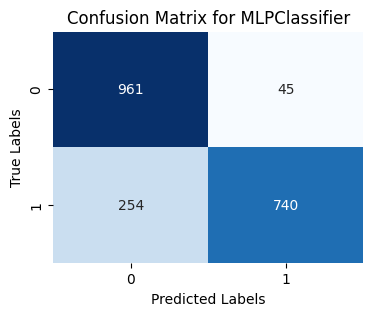

MLPClassifier: Precision on test data: 0.8668
MLPClassifier: Recall on test data: 0.8499
MLPClassifier: Accuracy on training Data: 0.867
MLPClassifier: Accuracy on test Data: 0.851


In [ ]:
#computing the accuracy, recall, and precision for training and test data
acc_train_mlp = accuracy_score(y_train,y_train_mlp)
acc_test_mlp = accuracy_score(y_test,y_test_mlp)
recall_mlp = recall_score(y_test, y_test_mlp, average='macro')
precision_mlp = precision_score(y_test, y_test_mlp, average='macro')

# compute the confusion matrix for test data
conf_matrix_tree = confusion_matrix(y_test, y_test_mlp)

# plot the confusion matrix in a nice plot
plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix_tree, annot=True, fmt='g', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for MLPClassifier') 
plt.show()

# print the precision and recall scores for test data
print("MLPClassifier: Precision on test data: {:.4f}".format(precision_mlp))
print("MLPClassifier: Recall on test data: {:.4f}".format(recall_mlp))
print("MLPClassifier: Accuracy on training Data: {:.3f}".format(acc_train_mlp))
print("MLPClassifier: Accuracy on test Data: {:.3f}".format(acc_test_mlp))

**Storing the results:**

In [ ]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('Multilayer Perceptrons', acc_train_mlp, acc_test_mlp)

### **7.4. XGBoost Classifier**


In [ ]:
#XGBoost Classification model
from xgboost import XGBClassifier

# instantiate the model
xgb = XGBClassifier(learning_rate=0.4,max_depth=7)
#fit the model
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.4, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [ ]:
#predicting the target value from the model for the samples
y_test_xgb = xgb.predict(X_test)
y_train_xgb = xgb.predict(X_train)

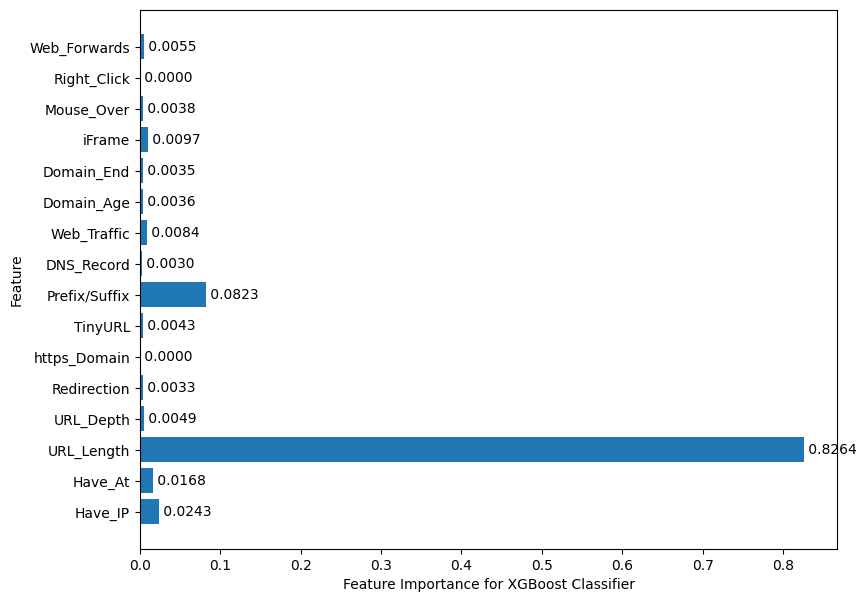

In [ ]:
# plot feature importance
plt.figure(figsize=(9,7))
n_features = X_train.shape[1]
feature_importance = xgb.feature_importances_
plt.barh(range(n_features), feature_importance, align='center')
plt.yticks(np.arange(n_features), X_train.columns)
plt.xlabel("Feature Importance for XGBoost Classifier")
plt.ylabel("Feature")
for i, v in enumerate(feature_importance):
    plt.text(v, i, " {:.4f}".format(v), color='black', va='center')
plt.show()


**Performance Evaluation:**

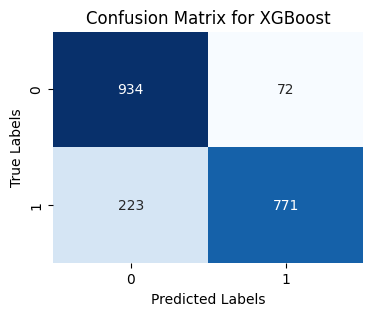

XGBoost: Precision on test data: 0.8609
XGBoost: Recall on test data: 0.8520
XGBoost: Accuracy on training Data: 0.869
XGBoost: Accuracy on test Data: 0.853


In [ ]:
#computing accuracy, recall, and precision for training and test data
acc_train_xgb = accuracy_score(y_train,y_train_xgb)
acc_test_xgb = accuracy_score(y_test,y_test_xgb)
recall_xgb = recall_score(y_test, y_test_xgb, average='macro')
precision_xgb = precision_score(y_test, y_test_xgb, average='macro')

# compute the confusion matrix for test data
conf_matrix_tree = confusion_matrix(y_test, y_test_xgb)

# plot the confusion matrix in a nice plot
plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix_tree, annot=True, fmt='g', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for XGBoost')
plt.show()

# print the precision and recall scores for test data
print("XGBoost: Precision on test data: {:.4f}".format(precision_xgb))
print("XGBoost: Recall on test data: {:.4f}".format(recall_xgb))
print("XGBoost: Accuracy on training Data: {:.3f}".format(acc_train_xgb))
print("XGBoost: Accuracy on test Data: {:.3f}".format(acc_test_xgb))

**Storing the results:**

In [ ]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('XGBoost', acc_train_xgb, acc_test_xgb)

### **7.5. Autoencoder Neural Network**


In [ ]:
#importing required packages
import keras
from keras.layers import Input, Dense
from keras import regularizers
import tensorflow as tf
from keras.models import Model
from sklearn import metrics

In [ ]:
#building autoencoder model

input_dim = X_train.shape[1]
encoding_dim = input_dim

input_layer = Input(shape=(input_dim, ))
encoder = Dense(encoding_dim, activation="relu",
                activity_regularizer=regularizers.l1(10e-4))(input_layer)
encoder = Dense(int(encoding_dim), activation="relu")(encoder)

encoder = Dense(int(encoding_dim-2), activation="relu")(encoder)
code = Dense(int(encoding_dim-4), activation='relu')(encoder)
decoder = Dense(int(encoding_dim-2), activation='relu')(code)

decoder = Dense(int(encoding_dim), activation='relu')(encoder)
decoder = Dense(input_dim, activation='relu')(decoder)
autoencoder = Model(inputs=input_layer, outputs=decoder)
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 16)]              0         
                                                                 
 dense (Dense)               (None, 16)                272       
                                                                 
 dense_1 (Dense)             (None, 16)                272       
                                                                 
 dense_2 (Dense)             (None, 14)                238       
                                                                 
 dense_5 (Dense)             (None, 16)                240       
                                                                 
 dense_6 (Dense)             (None, 16)                272       
                                                                 
Total params: 1,294
Trainable params: 1,294
Non-trainable par

In [ ]:
#compiling the model
autoencoder.compile(optimizer='adam',
                    loss='binary_crossentropy',
                    metrics=['accuracy'])

#Training the model
history = autoencoder.fit(X_train, X_train, epochs=10, batch_size=64, shuffle=True, validation_split=0.2) 

Epoch 1/10
100/100 [==============================] - 2s 5ms/step - loss: 4.7184 - accuracy: 0.0498 - val_loss: 3.4563 - val_accuracy: 0.1006
Epoch 2/10
100/100 [==============================] - 0s 3ms/step - loss: 3.3909 - accuracy: 0.0675 - val_loss: 3.2829 - val_accuracy: 6.2500e-04
Epoch 3/10
100/100 [==============================] - 0s 3ms/step - loss: 0.8947 - accuracy: 0.0016 - val_loss: -1.4689 - val_accuracy: 0.0037
Epoch 4/10
100/100 [==============================] - 0s 3ms/step - loss: -1.5687 - accuracy: 0.0012 - val_loss: -1.5857 - val_accuracy: 0.0037
Epoch 5/10
100/100 [==============================] - 0s 3ms/step - loss: -1.5950 - accuracy: 0.0012 - val_loss: -1.5835 - val_accuracy: 0.0037
Epoch 6/10
100/100 [==============================] - 0s 4ms/step - loss: -1.6070 - accuracy: 0.0012 - val_loss: -1.6280 - val_accuracy: 0.0037
Epoch 7/10
100/100 [==============================] - 0s 3ms/step - loss: -1.6720 - accuracy: 0.0012 - val_loss: -1.6695 - val_accuracy: 

**Performance Evaluation:**

In [ ]:
acc_train_auto = autoencoder.evaluate(X_train, X_train)[1]
acc_test_auto = autoencoder.evaluate(X_test, X_test)[1]

print('\nAutoencoder: Accuracy on training Data: {:.3f}' .format(acc_train_auto))
print('Autoencoder: Accuracy on test Data: {:.3f}' .format(acc_test_auto))

63/63 [==============================] - 0s 2ms/step - loss: -1.7217 - accuracy: 5.0000e-04

Autoencoder: Accuracy on training Data: 0.002
Autoencoder: Accuracy on test Data: 0.001


63/63 [==============================] - 0s 3ms/step


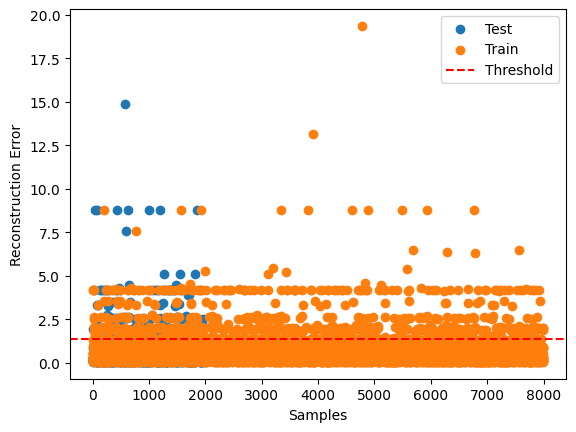

In [ ]:
# calculate the reconstruction error for the training and test sets
recon_train = autoencoder.predict(X_train)
recon_error_train = np.mean(np.square(X_train - recon_train), axis=1)
recon_test = autoencoder.predict(X_test)
recon_error_test = np.mean(np.square(X_test - recon_test), axis=1)

# create a scatter plot of the reconstruction error
plt.scatter(range(len(recon_error_test)), recon_error_test, label='Test')
plt.scatter(range(len(recon_error_train)), recon_error_train, label='Train')
plt.axhline(y=np.mean(recon_error_train) + np.std(recon_error_train), color='r', linestyle='--', label='Threshold')
plt.xlabel('Samples')
plt.ylabel('Reconstruction Error')
plt.legend()
plt.show()


**Storing the results:**

In [ ]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('AutoEncoder', acc_train_auto, acc_test_auto)

### **7.6. Support Vector Machines**



In [ ]:
#Support vector machine model
from sklearn.svm import SVC

# instantiate the model
svm = SVC(kernel='linear', C=1.0, random_state=12)
#fit the model
svm.fit(X_train, y_train)

SVC(kernel='linear', random_state=12)

In [ ]:
#predicting the target value from the model for the samples
y_test_svm = svm.predict(X_test)
y_train_svm = svm.predict(X_train)

**Performance Evaluation:**

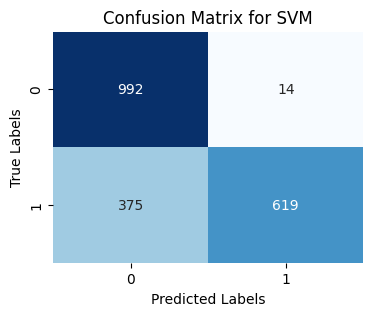

SVM: Precision on test data: 0.8518
SVM: Recall on test data: 0.8044
SVM: Accuracy on training data: 0.801
SVM: Accuracy on test data: 0.805


In [ ]:
#computing the accuracy, recall, and precision for training and test data
acc_train_svm = accuracy_score(y_train,y_train_svm)
acc_test_svm = accuracy_score(y_test,y_test_svm)
recall_svm = recall_score(y_test, y_test_svm, average='macro')
precision_svm = precision_score(y_test, y_test_svm, average='macro')

# Computing the confusion matrix for test data
conf_matrix_svm = confusion_matrix(y_test, y_test_svm)

# Plotting the confusion matrix in a nice plot
plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix_svm, annot=True, fmt='g', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for SVM')
plt.show()

# Printing the precision and recall scores for test data
print("SVM: Precision on test data: {:.4f}".format(precision_svm))
print("SVM: Recall on test data: {:.4f}".format(recall_svm))
print("SVM: Accuracy on training data: {:.3f}".format(acc_train_svm))
print("SVM: Accuracy on test data: {:.3f}".format(acc_test_svm))


**Storing the results:**

In [ ]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('SVM', acc_train_svm, acc_test_svm)

## **8. Comparision of Models**
To compare the models performance, a dataframe is created. The columns of this dataframe are the lists created to store the results of the model.

In [ ]:
#creating dataframe
results = pd.DataFrame({ 'ML Model': ML_Model,    
    'Train Accuracy': acc_train,
    'Test Accuracy': acc_test})
results

,ML Model,Train Accuracy,Test Accuracy
0,Decision Tree,0.839,0.834
1,Random Forest,0.842,0.832
2,Multilayer Perceptrons,0.867,0.850
3,XGBoost,0.869,0.852
4,AutoEncoder,0.002,0.001
5,SVM,0.801,0.806


In [ ]:
#Sorting the datafram on accuracy
results.sort_values(by=['Test Accuracy', 'Train Accuracy'], ascending=False)

,ML Model,Train Accuracy,Test Accuracy
3,XGBoost,0.869,0.852
2,Multilayer Perceptrons,0.867,0.850
0,Decision Tree,0.839,0.834
1,Random Forest,0.842,0.832
5,SVM,0.801,0.806
4,AutoEncoder,0.002,0.001


# **9. Conclusion**

From the above comparision, it is clear that the XGBoost Classifier works well with this dataset.

